In [1]:
import geopandas as gpd

In [2]:
DIR_DATA='https://raw.githubusercontent.com/meade68/DACSS_603D_Week04_HW1/refs/heads/main/DATA/'
JSON_WORLDINDICATORS = 'worldindicators.json'

C:\Users\meade\anaconda3\Lib\site-packages\pyogrio\core.py:35: RuntimeWarning: Could not detect GDAL data files.  Set GDAL_DATA environment variable to the correct path.
  _init_gdal_data()


,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
4,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
9,AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,"MULTIPOLYGON (((10.47124 46.87135, 10.48821 46..."
13,BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,"MULTIPOLYGON (((6.3982 50.32317, 6.34972 50.31..."
17,BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,"MULTIPOLYGON (((17.64984 42.88908, 17.57853 42..."
20,BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,"MULTIPOLYGON (((25.54667 51.92213, 25.43999 51..."


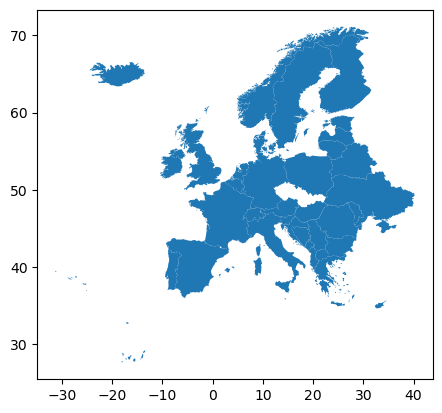

In [3]:
#read world
WORLD=gpd.read_file(DIR_DATA+JSON_WORLDINDICATORS)

#filter to a specific region
EUROPE= WORLD[ WORLD['region']== 'EUROPE' ]
EUROPE.plot()
EUROPE.head()

In [4]:
LYR_DOT_DENSITY= EUROPE.copy()
#LYR_DOT_DENSITY.head()
LYR_DOT_DENSITY.set_index('Country',inplace=True)
LYR_DOT_DENSITY['Dot_density']= (EUROPE['mobiles'] / 25000).astype(int).values 
LYR_DOT_DENSITY['geometry']= LYR_DOT_DENSITY.sample_points(size=LYR_DOT_DENSITY['Dot_density'],rng=123)

In [5]:
 EUROPE=EUROPE.to_crs(3035)

<Axes: >

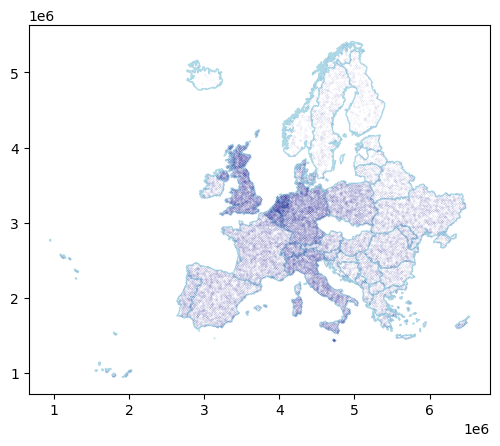

In [6]:
BASE= EUROPE.to_crs(3035)
LYR_DOT_DENSITY = LYR_DOT_DENSITY.to_crs(3035)

BASE_MAP=BASE.plot(facecolor='white',edgecolor='lightblue')
LYR_DOT_DENSITY.to_crs(3035).plot(markersize=.02,color='darkblue',ax=BASE_MAP,alpha=.2)


In [7]:
LYR_DOT_DENSITY.to_file('EUROPE_3035.gpkg',driver='GPKG',layer='DOT_DENSITY')
BASE.to_file('EUROPE_3035.gpkg',driver='GPKG',layer='BASEMAP')

In [8]:
LYR_CHORO= EUROPE.copy()
LYR_CHORO['mobiles_pcapita']= LYR_CHORO.mobiles/LYR_CHORO.population

<Axes: ylabel='Classifier'>

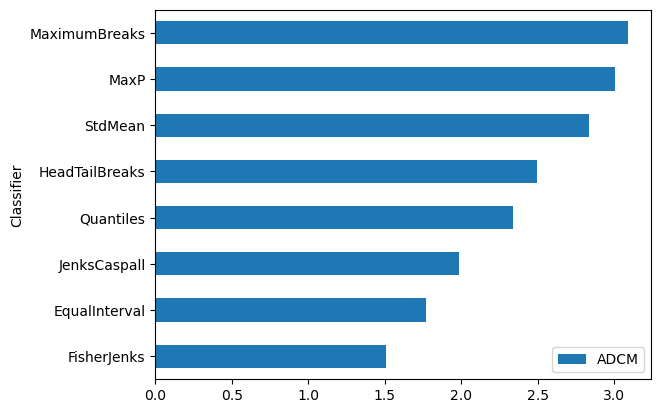

In [9]:
#Begin Choropleth stuff.

import mapclassify
import numpy as np
import pandas as pd

np.random.seed(123)

#five intervals
K=5
classify=LYR_CHORO['mobiles_pcapita']

ei5=mapclassify.EqualInterval(classify)
q5=mapclassify.Quantiles(classify,k=K)
msd = mapclassify.StdMean(classify)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(classify, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(classify) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(classify, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(classify, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(classify, k=K)



class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']


adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [10]:
#keep the lowest
LYR_CHORO['mobiles_pcapita_FJ5']=fj5.yb
LYR_CHORO

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,mobiles_pcapita,mobiles_pcapita_FJ5
4,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((5237716.722 1991495.045, 52378...",0.840012,0
9,AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,"MULTIPOLYGON (((4356958.434 2639878.637, 43582...",1.237737,2
13,BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,"MULTIPOLYGON (((4064601.234 3029754.546, 40610...",1.010216,1
17,BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,"MULTIPOLYGON (((4946542.244 2229875.734, 49401...",1.018777,1
20,BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,"MULTIPOLYGON (((5381197.567 3315060.938, 53740...",1.241916,2
24,BULGARIA,BG,BGR,EUROPE,50.6,38373000,110879,107,6782659,8010000,"MULTIPOLYGON (((5803126.201 2275905.569, 57997...",1.180953,2
43,CYPRUS,CY,CYP,EUROPE,57.8,8024000,9251,14,1320525,1430000,"MULTIPOLYGON (((6440486.761 1618473.489, 64359...",1.082903,1
44,DENMARK,DK,DNK,EUROPE,19.5,33850000,43094,102,5973136,7500000,"MULTIPOLYGON (((4223814.503 3731632.846, 42255...",1.255622,2
49,IRELAND,IE,IRL,EUROPE,20.6,35475000,70273,100,5233461,5760000,"MULTIPOLYGON (((3066313.655 3503169.69, 306441...",1.100610,1
51,ESTONIA,EE,EST,EUROPE,40.8,4924000,45228,34,1193791,2050000,"MULTIPOLYGON (((5350880.132 3951970.287, 53474...",1.717219,3


In [11]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

LYR_CHORO['mobiles_pcapita_FJ5_cat']=LYR_CHORO.loc[:,'mobiles_pcapita_FJ5'].replace(newLabelsForLevels)

# we have
LYR_CHORO.head(20)

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,mobiles_pcapita,mobiles_pcapita_FJ5,mobiles_pcapita_FJ5_cat
4,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((5237716.722 1991495.045, 52378...",0.840012,0,0_VeryLow
9,AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,"MULTIPOLYGON (((4356958.434 2639878.637, 43582...",1.237737,2,2_Middle
13,BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,"MULTIPOLYGON (((4064601.234 3029754.546, 40610...",1.010216,1,1_Low
17,BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,"MULTIPOLYGON (((4946542.244 2229875.734, 49401...",1.018777,1,1_Low
20,BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,"MULTIPOLYGON (((5381197.567 3315060.938, 53740...",1.241916,2,2_Middle
24,BULGARIA,BG,BGR,EUROPE,50.6,38373000,110879,107,6782659,8010000,"MULTIPOLYGON (((5803126.201 2275905.569, 57997...",1.180953,2,2_Middle
43,CYPRUS,CY,CYP,EUROPE,57.8,8024000,9251,14,1320525,1430000,"MULTIPOLYGON (((6440486.761 1618473.489, 64359...",1.082903,1,1_Low
44,DENMARK,DK,DNK,EUROPE,19.5,33850000,43094,102,5973136,7500000,"MULTIPOLYGON (((4223814.503 3731632.846, 42255...",1.255622,2,2_Middle
49,IRELAND,IE,IRL,EUROPE,20.6,35475000,70273,100,5233461,5760000,"MULTIPOLYGON (((3066313.655 3503169.69, 306441...",1.100610,1,1_Low
51,ESTONIA,EE,EST,EUROPE,40.8,4924000,45228,34,1193791,2050000,"MULTIPOLYGON (((5350880.132 3951970.287, 53474...",1.717219,3,3_High


In [12]:
#Save to file
LYR_CHORO.to_file('EUROPE_3035.gpkg',driver='GPKG',layer='CHOROPLETH')

In [13]:
##Startt proportional symbol stuff
import numpy as np
LYR_PROP_SYMBOL= EUROPE.copy()
max_size=40
min_size=1

scaled_sizes = np.sqrt(
    (LYR_PROP_SYMBOL.mobiles - LYR_PROP_SYMBOL.mobiles.min()) / (LYR_PROP_SYMBOL.mobiles.max() - LYR_PROP_SYMBOL.mobiles.min())
) * (max_size-1) + min_size

scaled_sizes.sort_values()
LYR_PROP_SYMBOL['size']= scaled_sizes.values

In [14]:
LYR_PROP_SYMBOL.set_index('Country',inplace=True)

#this is just a copy (new index names)
LYR_PROP_SYMBOL.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size
Country,,,,,,,,,,,
ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((5237716.722 1991495.045, 52378...",6.569989
AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,"MULTIPOLYGON (((4356958.434 2639878.637, 43582...",13.432656
BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,"MULTIPOLYGON (((4064601.234 3029754.546, 40610...",14.004725
BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,"MULTIPOLYGON (((4946542.244 2229875.734, 49401...",8.025685
BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,"MULTIPOLYGON (((5381197.567 3315060.938, 53740...",13.835782


In [15]:

LYR_PROP_SYMBOL['geometry']=LYR_PROP_SYMBOL['geometry'].centroid




In [16]:
LYR_PROP_SYMBOL

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size
Country,,,,,,,,,,,
ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,POINT (5167301.903 2060335.036),6.569989
AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,POINT (4631119.041 2729421.904),13.432656
BELGIUM,BE,BEL,EUROPE,28.6,128247000,30528,48,11977634,12100000,POINT (3944438.989 3072660.664),14.004725
BOSNIA AND HERZEGOVINA,BA,BIH,EUROPE,71.3,16209000,51197,20,3798671,3870000,POINT (4944345.124 2371972.928),8.025685
BELARUS,BY,BLR,EUROPE,68.2,54695000,207600,46,9501451,11800000,POINT (5502192.135 3528152.061),13.835782
BULGARIA,BG,BGR,EUROPE,50.6,38373000,110879,107,6782659,8010000,POINT (5561188.878 2310506.153),11.469258
CYPRUS,CY,CYP,EUROPE,57.8,8024000,9251,14,1320525,1430000,POINT (6426234.473 1652981.689),4.722024
DENMARK,DK,DNK,EUROPE,19.5,33850000,43094,102,5973136,7500000,POINT (4324821.547 3650304.071),11.108604
IRELAND,IE,IRL,EUROPE,20.6,35475000,70273,100,5233461,5760000,POINT (3121228.499 3490747.92),9.767181


<Axes: >

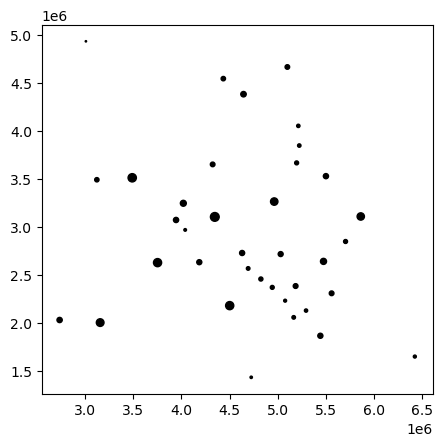

In [17]:
LYR_PROP_SYMBOL.plot(
    markersize=LYR_PROP_SYMBOL['size'],
    color='black'
)

In [18]:
LYR_PROP_SYMBOL.to_file('EUROPE_3035.gpkg',driver='GPKG',layer='PROP_SYMBOL')